In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("avocado.csv")
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.shape

(18249, 14)

In [5]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.

In [7]:
#Add months column
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [8]:
prices = df.pivot_table( values = "AveragePrice", index = "month", columns = "year")

<AxesSubplot:title={'center':'Average Avocado Price'}, xlabel='Month', ylabel='Price'>

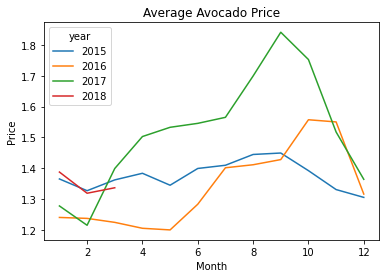

In [9]:
prices.plot(title = "Average Avocado Price", ylabel = "Price", xlabel = "Month")

In [10]:
volume = df.pivot_table(values = "Total Volume", index = "month", columns = "year")

<AxesSubplot:title={'center':'Average Volume Sold'}, xlabel='Month', ylabel='Volume'>

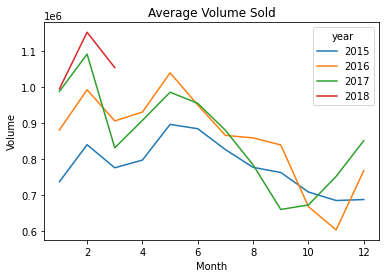

In [11]:
volume.plot(title = "Average Volume Sold", ylabel = "Volume", xlabel = "Month")

In [13]:
p2015 = prices[2015]
v2015 = volume[2015]
table2015 = pd.concat([p2015, v2015], axis = 1)
table2015.columns = ["Price", "Volume"]

p2016 = prices[2016]
v2016 = volume[2016]
table2016 = pd.concat([p2016, v2016], axis = 1)
table2016.columns = ["Price", "Volume"]

p2017 = prices[2017]
v2017 = volume[2017]
table2017 = pd.concat([p2017, v2017], axis = 1)
table2017.columns = ["Price", "Volume"]

p2018 = prices[2018]
v2018 = volume[2018]
table2018 = pd.concat([p2018, v2018], axis = 1)
table2018.columns = ["Price", "Volume"]

[Text(0.5, 0, 'Volume')]

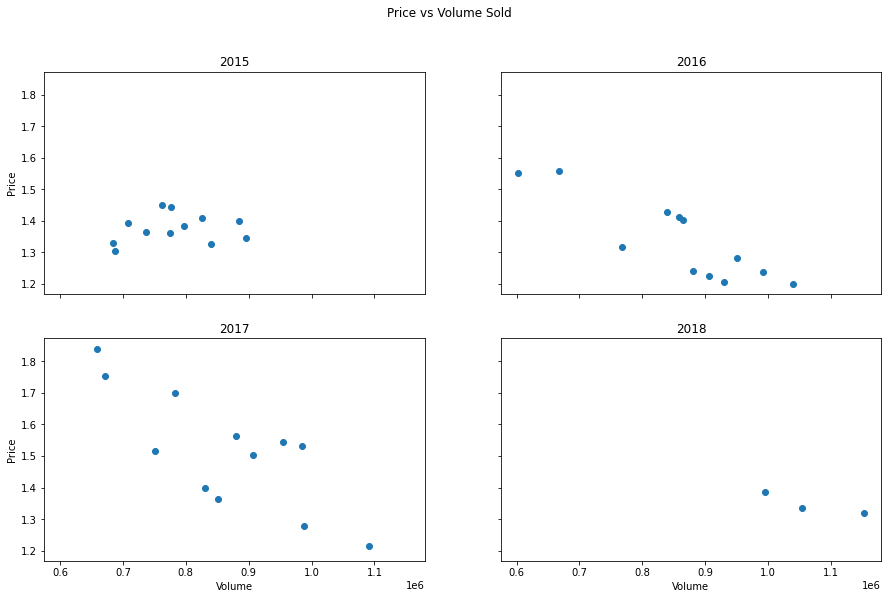

In [17]:
fig, axs = plt.subplots(2,2, sharex = True, sharey = True)
fig.suptitle("Price vs Volume Sold")
fig.set_size_inches(15, 9)

axs[0,0].scatter(table2015["Volume"],table2015["Price"])
axs[0,0].set_title('2015')
axs[0,0].set(ylabel = "Price")

axs[0,1].scatter(table2016["Volume"],table2016["Price"])
axs[0,1].set_title('2016')

axs[1,0].scatter(table2017["Volume"],table2017["Price"])
axs[1,0].set_title('2017')
axs[1,0].set(xlabel = "Volume", ylabel = "Price")

axs[1,1].scatter(table2018["Volume"],table2018["Price"])
axs[1,1].set_title('2018')
axs[1,1].set(xlabel = "Volume")


In [18]:
regions = df.pivot_table(values = "Total Volume", index = "region", aggfunc=np.sum)
regions.sort_values("Total Volume", ascending = False).head()

,Total Volume
region,
TotalUS,5.864740e+09
West,1.086779e+09
California,1.028982e+09
SouthCentral,1.011280e+09
Northeast,7.132809e+08


In [19]:
regions.sort_values("Total Volume").head()

,Total Volume
region,
Syracuse,10942667.68
Boise,14413187.75
Spokane,15565275.48
Albany,16067799.97
Louisville,16097002.40


In [21]:
topcities = df[(df["region"] == "LosAngeles") | (df["region"] == "NewYork") | 
                 (df["region"] == "DallasFtWorth") | (df["region"] == "Houston") | 
                 (df["region"] == "PhoenixTucson")]

topcities

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
572,0,2015-12-27,0.80,1020390.64,494425.64,276556.76,84912.97,164495.27,136560.04,12277.70,15657.53,conventional,2015,DallasFtWorth,12
573,1,2015-12-20,0.82,928051.16,439792.68,257532.45,91158.34,139567.69,103511.91,10331.25,25724.53,conventional,2015,DallasFtWorth,12
574,2,2015-12-13,0.79,980891.18,476178.99,319789.56,62436.80,122485.83,114978.22,7472.99,34.62,conventional,2015,DallasFtWorth,12
575,3,2015-12-06,0.74,1054849.97,514160.41,412692.22,8533.47,119463.87,108772.12,10525.27,166.48,conventional,2015,DallasFtWorth,12
576,4,2015-11-29,0.80,839818.87,477944.48,244879.52,6211.50,110783.37,96799.40,13967.44,16.53,conventional,2015,DallasFtWorth,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18004,7,2018-02-04,1.62,14456.10,2260.81,2011.22,0.00,10184.07,10169.69,14.38,0.00,organic,2018,PhoenixTucson,2
18005,8,2018-01-28,1.69,13125.79,1802.37,2243.06,0.00,9080.36,9073.81,6.55,0.00,organic,2018,PhoenixTucson,1
18006,9,2018-01-21,1.78,12112.82,2178.78,1901.41,0.00,8032.63,8031.33,1.30,0.00,organic,2018,PhoenixTucson,1
18007,10,2018-01-14,1.77,13514.36,3618.90,2795.53,0.00,7099.93,7086.72,13.21,0.00,organic,2018,PhoenixTucson,1


In [22]:
bottomcities = df[(df["region"] == "Louisville") | (df["region"] == "Albany") | 
                 (df["region"] == "Spokane") | (df["region"] == "Boise") | 
                 (df["region"] == "Syracuse")]

bottomcities

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,7,2018-02-04,1.22,6294.16,85.22,152.09,0.00,6056.85,2847.48,3209.37,0.0,organic,2018,Syracuse,2
18197,8,2018-01-28,1.19,6393.58,30.09,128.49,0.00,6235.00,5670.94,564.06,0.0,organic,2018,Syracuse,1
18198,9,2018-01-21,1.27,3159.80,92.12,73.17,0.00,2994.51,2117.69,876.82,0.0,organic,2018,Syracuse,1
18199,10,2018-01-14,1.25,4343.09,116.19,64.16,0.00,4162.74,1986.09,2176.65,0.0,organic,2018,Syracuse,1


In [23]:
data["Date"].max()

'2018-03-25'

In [24]:
t_citiestable = topcities.pivot_table(values = "Total Volume", index = "year", columns = "region", aggfunc=np.sum)

#drop 2018 as data is only up to March 2018.
t_citiestable = t_citiestable.drop(2018, axis = 0)

t_citiestable

region,DallasFtWorth,Houston,LosAngeles,NewYork,PhoenixTucson
year,,,,,
2015,60311308.63,55387471.37,1.482207e+08,70607635.91,57176285.48
2016,63695249.88,58704786.43,1.631423e+08,71546563.14,59283687.23
2017,66240982.71,69093092.89,1.584812e+08,74850673.31,61170534.26


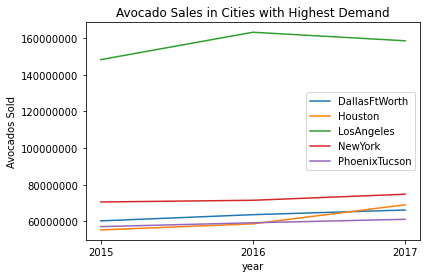

In [36]:
ax = t_citiestable.plot(xticks = t_citiestable.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Avocado Sales in Cities with Highest Demand')
ax.legend()

In [38]:
b_citiestable = pd.pivot_table(bottomcities, values = "Total Volume", index = "year", columns = "region", aggfunc=np.sum)

#drop 2018 column as data is only up to March 2018.
b_citiestable = b_citiestable.drop(2018, axis = 0)

b_citiestable

region,Albany,Boise,Louisville,Spokane,Syracuse
year,,,,,
2015,4029896.43,3784357.34,4289003.17,4181687.17,2734333.26
2016,5264335.59,4653509.53,5076328.78,5006166.54,3429368.74
2017,5231581.78,4760561.31,5260109.44,5151528.30,3731978.02


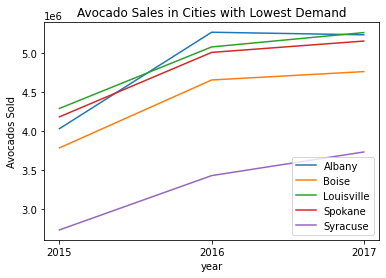

In [40]:
ax = b_citiestable.plot(xticks = b_citiestable.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.set_title('Avocado Sales in Cities with Lowest Demand')
ax.legend()

In [41]:
avo_4046 = df.pivot_table(values = "4046", index = "region", aggfunc = np.sum)
avo_4046.sort_values("4046", ascending = False).head()

,4046
region,
TotalUS,2.054936e+09
SouthCentral,5.350414e+08
California,3.989670e+08
West,3.985905e+08
Southeast,3.396871e+08


In [43]:
avo_4225 = df.pivot_table(values = "4225", index = "region", aggfunc = np.sum)
avo_4225.sort_values("4225", ascending = False).head()

,4225
region,
TotalUS,2.015012e+09
Northeast,4.744847e+08
California,3.514914e+08
West,3.007589e+08
GreatLakes,2.672577e+08


In [44]:
avo_4770 = pd.pivot_table(data, values = "4770", index = "region", aggfunc = np.sum)
avo_4770.sort_values("4770", ascending = False).head()

,4770
region,
TotalUS,1.561752e+08
GreatLakes,5.007597e+07
California,3.184105e+07
SouthCentral,2.239579e+07
West,2.035607e+07


In [45]:
avo_types = df.pivot_table(values = ["4046", "4225", "4770", "Total Volume"], index = "year", aggfunc = np.sum )
avo_types

,4046,4225,4770,Total Volume
year,,,,
2015,1.709450e+09,1.761054e+09,1.427724e+08,4.385469e+09
2016,1.525123e+09,1.672728e+09,1.598798e+08,4.820890e+09
2017,1.652038e+09,1.544735e+09,9.121751e+07,4.934306e+09
2018,4.604997e+08,4.077587e+08,2.293259e+07,1.382738e+09


In [46]:
avo_types = avo_types.drop(2018, axis = 0)
avo_types = avo_types.drop("Total Volume", axis = 1)

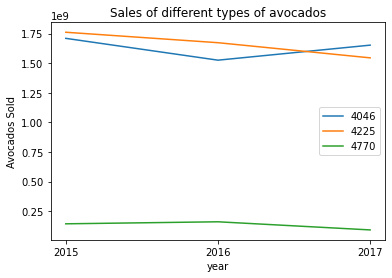

In [47]:
ax = avo_types.plot(xticks = avo_types.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.set_title('Sales of different types of avocados')
ax.legend()

In [48]:
avo_types = df.pivot_table(values = ["4046", "4225", "4770", "Total Volume"], index = "year", aggfunc = np.sum )

avo_types["Other"] = avo_types["Total Volume"] - avo_types["4046"] - avo_types["4225"] - avo_types["4770"]
avo_pie = avo_types.drop("Total Volume", axis = 1)

avo_pie

,4046,4225,4770,Other
year,,,,
2015,1.709450e+09,1.761054e+09,1.427724e+08,7.721923e+08
2016,1.525123e+09,1.672728e+09,1.598798e+08,1.463159e+09
2017,1.652038e+09,1.544735e+09,9.121751e+07,1.646315e+09
2018,4.604997e+08,4.077587e+08,2.293259e+07,4.915473e+08


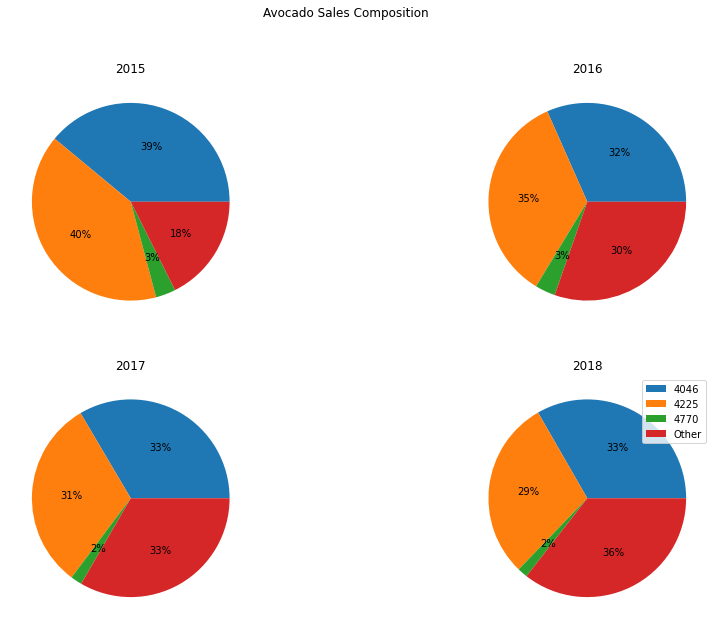

In [55]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Avocado Sales Composition")
fig.set_size_inches(15,10)

axs[0,0].pie(avo_pie.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')

axs[0,1].pie(avo_pie.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')

axs[1,0].pie(avo_pie.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(avo_pie.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')
axs[1,1].legend(avo_pie.columns)

In [57]:
bags = df.pivot_table(index = "year", values = ["Large Bags", "Small Bags", "XLarge Bags"], aggfunc = np.sum)
bags

,Large Bags,Small Bags,XLarge Bags
year,,,
2015,1.320664e+08,6.346827e+08,5443128.28
2016,3.366263e+08,1.106494e+09,20038284.84
2017,3.993390e+08,1.222953e+09,23997172.34
2018,1.235840e+08,3.607414e+08,7210591.87


Text(0.5, 1.0, '2018')

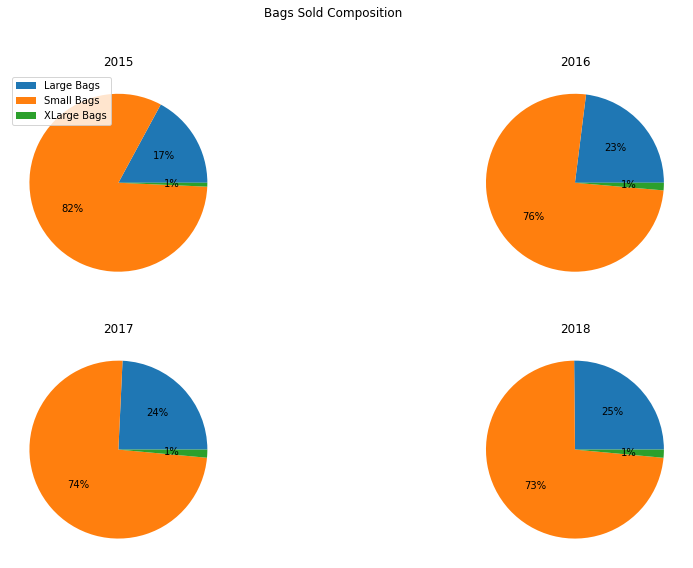

In [60]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Bags Sold Composition")
fig.set_size_inches(15, 9)

axs[0,0].pie(bags.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')
axs[0,0].legend(bags.columns)

axs[0,1].pie(bags.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')

axs[1,0].pie(bags.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(bags.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')


In [61]:
bags = bags.drop(2018, axis = 0)

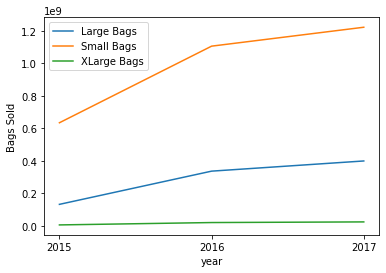

In [63]:
ax = bags.plot(xticks = bags.index)
ylab = ax.set_ylabel('Bags Sold')
ax.legend()


In [65]:
# Split data by year

df_2015 = df[df["year"] == 2015]
df_2016 = df[df["year"] == 2016]
df_2017 = df[df["year"] == 2017]
df_2018 = df[df["year"] == 2018]

In [66]:
years = [2015, 2016, 2017]
dfs = [df_2015, df_2016, df_2017, df_2018]
con_total = []
org_total = []

In [68]:
year = 2015
for df in dfs:
    
    c_year = df[df["type"] == "conventional"]
    o_year = df[df["type"] == "organic"]

    c_year_total = np.round(c_year["Total Volume"].sum())
    o_year_total = np.round(o_year["Total Volume"].sum())

    print(c_year_total, "bags of conventional avocados sold in", year)
    print(o_year_total, "bags of organic avocados sold in", year)

    con_total.append(c_year_tot)
    org_total.append(o_year_tot)
    
    year += 1

4296599236.0 bags of conventional avocados sold in 2015
88869426.0 bags of organic avocados sold in 2015
4690249813.0 bags of conventional avocados sold in 2016
130640079.0 bags of organic avocados sold in 2016
4766165793.0 bags of conventional avocados sold in 2017
168139906.0 bags of organic avocados sold in 2017
1334206069.0 bags of conventional avocados sold in 2018
48532271.0 bags of organic avocados sold in 2018


In [69]:
years.append(2018)

In [70]:
con_org_dic = {"Conventional": con_total, "Organic": org_total}
con_org = pd.DataFrame(con_org_dic, index = years)
con_org

,Conventional,Organic
2015,4.296599e+09,88869426.0
2016,4.296599e+09,88869426.0
2017,4.296599e+09,88869426.0
2018,4.296599e+09,88869426.0


Text(0.5, 1.0, '2018')

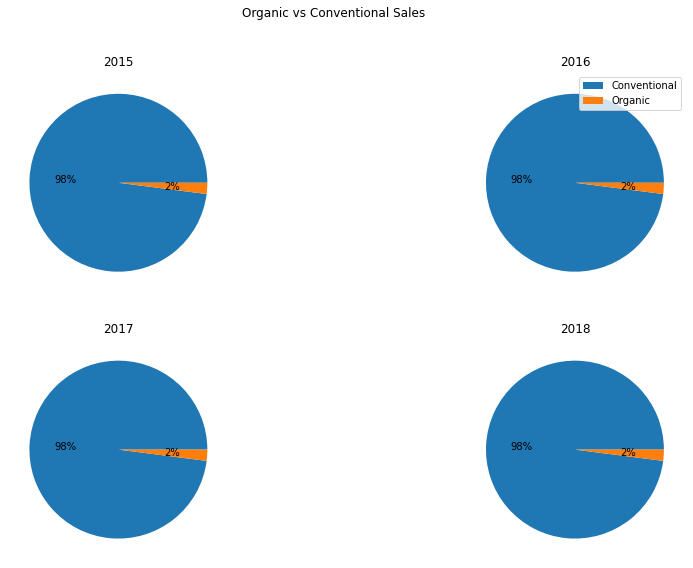

In [72]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Organic vs Conventional Sales")
fig.set_size_inches(15, 9)

axs[0,0].pie(con_org.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')

axs[0,1].pie(con_org.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')
axs[0,1].legend(con_org.columns)

axs[1,0].pie(con_org.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(con_org.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')

In [73]:
con_org = con_org.drop(2018, axis = 0)

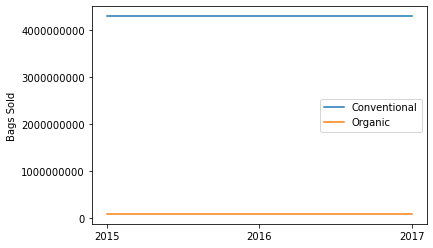

In [82]:
ax = con_org.plot(xticks = con_org.index)
ylab = ax.set_ylabel('Bags Sold')
ax.ticklabel_format(useOffset=False, style='plain')
ax.legend()

In [83]:
conventional = df[df["type"] == "conventional"]
organic = df[df["type"] == "organic"]

In [84]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
8478,0,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018,Albany,3
8479,1,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany,3
8480,2,2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2018,Albany,3
8481,3,2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2018,Albany,3
8482,4,2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2018,Albany,2


In [86]:
con_ratio = conventional.pivot_table(index = "region", columns = "type", values = "Total Volume", aggfunc = np.sum)
org_ratio = organic.pivot_table(index = "region", columns = "type", values = "Total Volume", aggfunc = np.sum)

In [87]:
con_org_ratio = pd.concat([con_ratio, org_ratio], axis = 1)
con_org_ratio["Total"] = con_org_ratio["conventional"] + con_org_ratio["organic"]

con_org_ratio["% Organic"] = con_org_ratio["organic"] / con_org_ratio["Total"] *100

con_org_ratio.sort_values("% Organic", ascending = False).head()

type,conventional,organic,Total,% Organic
region,,,,
Seattle,6996900.20,944194.15,7941094.35,11.889975
Pittsburgh,1741665.96,159853.76,1901519.72,8.406632
BuffaloRochester,1959918.10,163899.94,2123818.04,7.717231
NewYork,22061729.80,1667525.37,23729255.17,7.027298
Syracuse,978729.93,68257.73,1046987.66,6.519440


In [88]:
con_org_ratio["% Organic"].describe()

count    54.000000
mean      3.972780
std       2.037109
min       1.058831
25%       2.537034
50%       3.581085
75%       5.020338
max      11.889975
Name: % Organic, dtype: float64